In [1]:
%matplotlib inline
import pandas as pd
from pivottablejs import pivot_ui
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
StudentVector = pd.read_csv(r"C:\Users\John\OneDrive\Work\educational data mining consulting\MSU project pathways\data\StudentVector.csv")

In [3]:
# everyone = pd.DataFrame({'Ethnicity':
#                         ,'First Gen':
#                         ,'Gender':}
#                        ,index=['everyone',])

# graduated = pd.DataFrame({'Ethnicity':
#                         ,'First Gen':
#                         ,'Gender':}
#                        ,index=['graduated'everyone = pd.DataFrame({'Ethnicity':
#                         ,'First Gen':
#                         ,'Gender':}
#                        ,index=['everyone',])

# graduated = pd.DataFrame({'Ethnicity':
#                         ,'First Gen':
#                         ,'Gender':}
#                        ,index=['graduated',])

# phys_graduated = pd.DataFrame({'Ethnicity'
#                         ,'First Gen':
#                         ,'Gender':}
#                        ,index=['physics graduates',])

# demographics = pd.concat([everyone, graduated, phys_graduated]),])

# phys_graduated = pd.DataFrame({'Ethnicity'
#                         ,'First Gen':
#                         ,'Gender':}
#                        ,index=['physics graduates',])

# demographics = pd.concat([everyone, graduated, phys_graduated])

In [4]:
PhysicsGrads = StudentVector[StudentVector['degree conferred for this major'] == 'Y']

In [5]:
graduated_students = StudentVector[(StudentVector['degree conferred for this major'] == 'N')
             & (StudentVector['graduated MSU'] == 'Y')]

In [6]:
everyone_n = StudentVector.Ethnicity.count()
graduated_students_n = graduated_students.Ethnicity.count()
physics_n = PhysicsGrads.Ethnicity.count()

ethnicity = pd.DataFrame({'Everyone':StudentVector.Ethnicity.value_counts()/StudentVector.Ethnicity.count()
                         ,'Graduates':graduated_students.Ethnicity.value_counts()/graduated_students.Ethnicity.count()
                         ,'Physics Graduates':PhysicsGrads.Ethnicity.value_counts()/PhysicsGrads.Ethnicity.count()}
                         ,index=StudentVector.Ethnicity.value_counts().index)

first_gen = pd.DataFrame({'Everyone':StudentVector['First Gen'].value_counts()/StudentVector['First Gen'].count()
                         ,'Graduates':graduated_students['First Gen'].value_counts()/graduated_students['First Gen'].count()
                         ,'Physics Graduates':PhysicsGrads['First Gen'].value_counts()/PhysicsGrads['First Gen'].count()}
                         ,index=StudentVector['First Gen'].value_counts().index)

gender = pd.DataFrame({'Everyone':StudentVector['gndr_flag'].value_counts()/StudentVector['gndr_flag'].count()
                         ,'Graduates':graduated_students['gndr_flag'].value_counts()/graduated_students['gndr_flag'].count()
                         ,'Physics Graduates':PhysicsGrads['gndr_flag'].value_counts()/PhysicsGrads['gndr_flag'].count()}
                         ,index=StudentVector['gndr_flag'].value_counts().index)

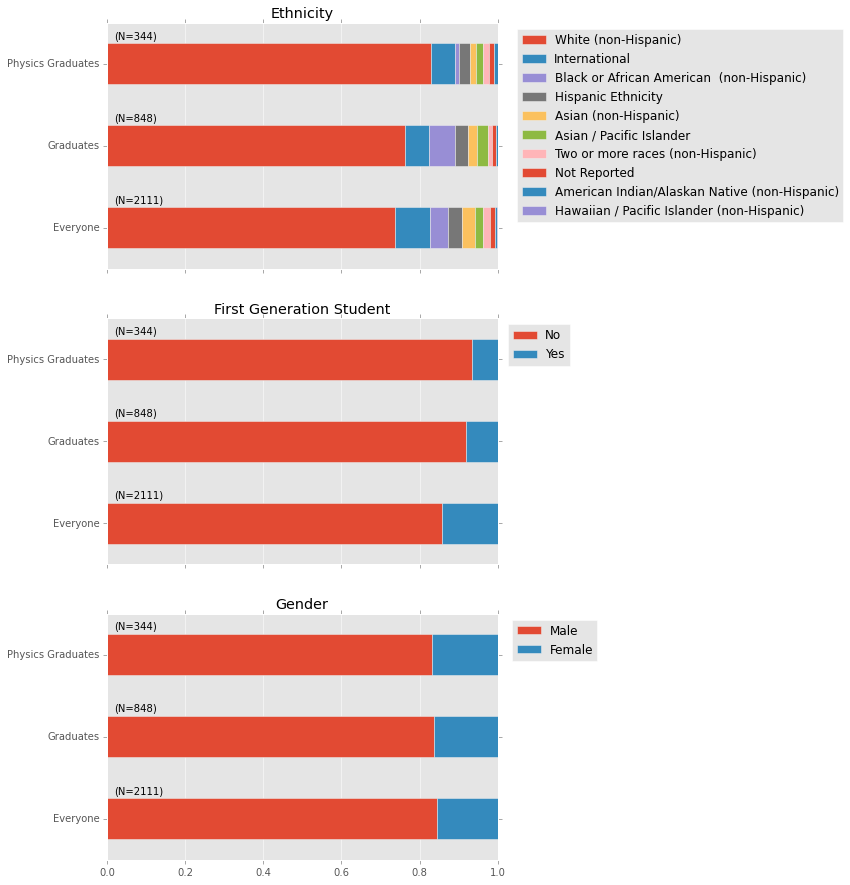

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(7,15))

ethnicity.transpose().plot(kind='barh', stacked=True, legend=False, ax=ax1)
ax1.set_xlim(0,1)
ax1.legend(bbox_to_anchor=(1.9,1))
ax1.set_title('Ethnicity')
ax1.text(x=0.02,y=0.3,s='(N={everyone_n})'.format(everyone_n=everyone_n))
ax1.text(x=0.02,y=1.3,s='(N={graduated_students_n})'.format(graduated_students_n=graduated_students_n))
ax1.text(x=0.02,y=2.3,s='(N={physics_n})'.format(physics_n=physics_n))

first_gen.transpose().plot(kind='barh', stacked=True, legend=False, ax=ax2)
ax2.legend(['No', 'Yes'], bbox_to_anchor=(1.2,1))
ax2.set_title('First Generation Student')
ax2.text(x=0.02,y=0.3,s='(N={everyone_n})'.format(everyone_n=everyone_n))
ax2.text(x=0.02,y=1.3,s='(N={graduated_students_n})'.format(graduated_students_n=graduated_students_n))
ax2.text(x=0.02,y=2.3,s='(N={physics_n})'.format(physics_n=physics_n))

gender.transpose().plot(kind='barh', stacked=True, legend=False, ax=ax3)
ax3.legend(['Male', 'Female'], bbox_to_anchor=(1.27,1))
ax3.set_title('Gender')
ax3.text(x=0.02,y=0.3,s='(N={everyone_n})'.format(everyone_n=everyone_n))
ax3.text(x=0.02,y=1.3,s='(N={graduated_students_n})'.format(graduated_students_n=graduated_students_n))
ax3.text(x=0.02,y=2.3,s='(N={physics_n})'.format(physics_n=physics_n))

In [8]:
non_phys_grads = StudentVector[(StudentVector['graduated MSU']=='Y') & (StudentVector['degree conferred for this major']=='N')]

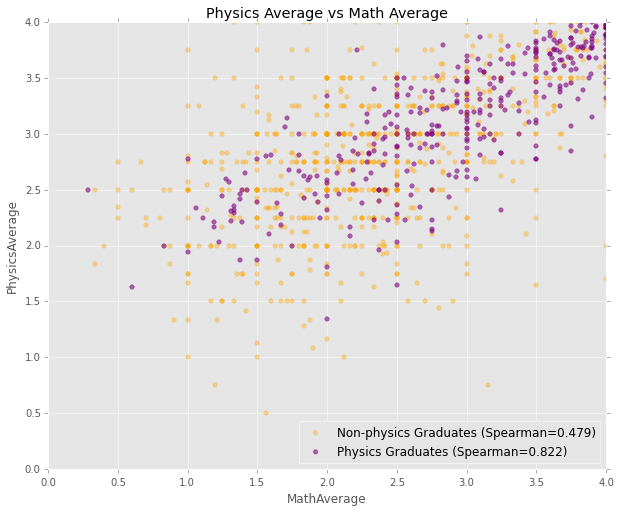

In [66]:
ax = non_phys_grads[(non_phys_grads.MathAverage > 0) &
                       (non_phys_grads.PhysicsAverage > 0)].plot(kind='scatter', x='MathAverage', y='PhysicsAverage'
                             ,alpha=0.4, figsize=(10,8), label='Non Physics Graduates', color='orange')
ax2 = PhysicsGrads[(PhysicsGrads.MathAverage > 0) &
                       (PhysicsGrads.PhysicsAverage > 0)].plot(kind='scatter', x='MathAverage'
                                                               , y='PhysicsAverage', ax=ax, alpha=0.6
                                                              ,label='Physics Graduates', color='purple')

ax.set_ylim(0,4)
ax.set_xlim(0,4)
ax.legend(['Non-physics Graduates (Spearman=0.479)'
          ,'Physics Graduates (Spearman=0.822)'], scatterpoints=1, loc='lower right')
ax.set_title('Physics Average vs Math Average')

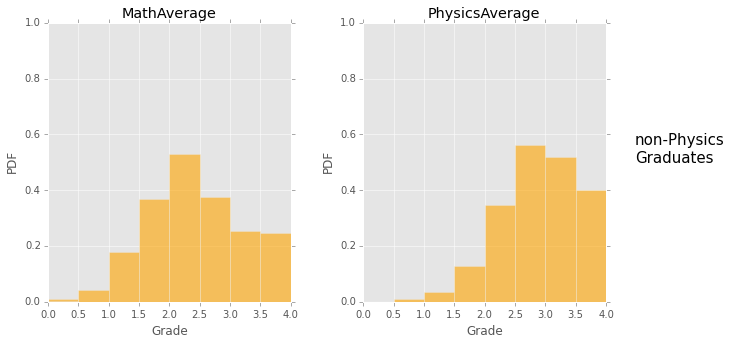

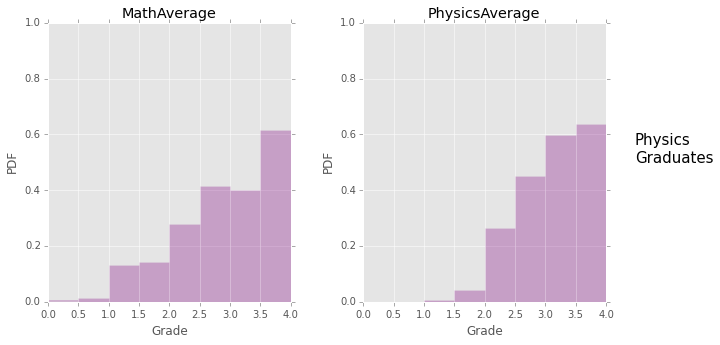

In [69]:
ax = non_phys_grads[(non_phys_grads.MathAverage > 0) &
                       (non_phys_grads.PhysicsAverage > 0)][['MathAverage', 'PhysicsAverage']].hist(figsize=(10,5)
                                                                                                   ,normed=True
                                                                                                   ,range=(0,4)
                                                                                                   ,bins=8
                                                                                                   ,color='orange'
                                                                                                   ,alpha=0.6)

ax2 = PhysicsGrads[(PhysicsGrads.MathAverage > 0) &
                       (PhysicsGrads.PhysicsAverage > 0)][['MathAverage', 'PhysicsAverage']].hist(figsize=(10,5)
                                                                                                 ,normed=True
                                                                                                 ,range=(0,4)
                                                                                                 ,bins=8
                                                                                                 ,color='purple'
                                                                                                 ,alpha=0.3)


ax[0][0].set_ylim(0,1)
ax[0][1].set_ylim(0,1)
ax2[0][0].set_ylim(0,1)
ax2[0][1].set_ylim(0,1)

ax[0][1].text(s='non-Physics\nGraduates',x=4.5,y=.5, fontsize=15)
ax2[0][1].text(s='Physics\nGraduates',x=4.5,y=.5, fontsize=15)

ax[0][0].set_xlabel('Grade')
ax[0][1].set_xlabel('Grade')
ax2[0][0].set_xlabel('Grade')
ax2[0][1].set_xlabel('Grade')

ax[0][0].set_ylabel('PDF')
ax[0][1].set_ylabel('PDF')
ax2[0][0].set_ylabel('PDF')
ax2[0][1].set_ylabel('PDF')

(array([[  0.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   2.,   1.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   1.,   1.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   1.,   2.,   0.,   4.,   6.,   1.,   7.,   2.,   0.,
           1.,   0.,   1.,   0.],
        [  0.,   1.,   0.,   1.,   3.,   0.,   5.,   2.,   4.,   7.,   2.,
           1.,   1.,   0.,   0.],
        [  0.,   0.,   2.,   1.,   1.,   6.,   5.,   7.,  11.,   7.,   3.,
           2.,   3.,   1.,   2.],
        [  1.,   0.,   0.,   0.,   4.,   4.,   4.,  12.,   8.,   9.,   6.,
           4.,   2.,   1.,   0.],
        [  0.,   0.,   2.,   2.,   1.,   5.,  11.,   9.,  16.,  16.,  16.,
           7.,   7.,   1.,   2.],
        [  0.,   0.,   1.,   0.,   1.,   2.,   5.,   7.,  15.,  16.,  16.,
           7.,   9.,   1.,   2.],
        [  0.,   0.,   0.,   0.,   1.,   3.,   8.,  10.,  25.,  17.,  22.,
           9.,  11.,   3.,   2.],
        [  0.,   0.

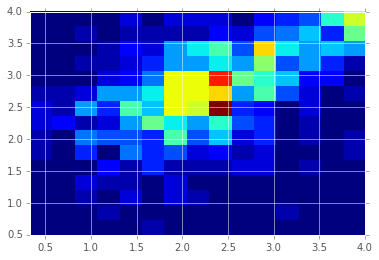

In [23]:
x = non_phys_grads[(non_phys_grads.MathAverage > 0) &(non_phys_grads.PhysicsAverage > 0)]['MathAverage']
y = non_phys_grads[(non_phys_grads.MathAverage > 0) &(non_phys_grads.PhysicsAverage > 0)]['PhysicsAverage']
plt.hist2d(x=x,y=y, bins=15)

In [10]:
non_phys_contour = non_phys_grads[(non_phys_grads.MathAverage > 0) &(non_phys_grads.PhysicsAverage > 0)][['MathAverage','PhysicsAverage']]

In [27]:
phys_contour = PhysicsGrads[(PhysicsGrads.MathAverage > 0) & (PhysicsGrads.PhysicsAverage > 0)][['MathAverage', 'PhysicsAverage']]

In [30]:
X,Y = np.meshgrid(non_phys_contour.MathAverage, non_phys_contour.PhysicsAverage)

In [ ]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
#x = np.arange(-3.0, 3.0, delta)
#y = np.arange(-2.0, 2.0, delta)
X,Y = np.meshgrid(non_phys_contour.MathAverage, non_phys_contour.PhysicsAverage)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)



# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


# contour labels can be placed manually by providing list of positions
# (in data coordinate). See ginput_manual_clabel.py for interactive
# placement.
plt.figure()
CS = plt.contour(X, Y, Z)
manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
plt.title('labels at selected locations')


# You can force all the contours to be the same color.
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k', # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours dashed')

# You can set negative contours to be solid instead of dashed:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k', # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours solid')


# And you can manually specify the colors of the contour
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 linewidths=np.arange(.5, 4, .5),
                 colors=('r', 'green', 'blue', (1,1,0), '#afeeee', '0.5')
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Crazy lines')


# Or you can use a colormap to specify the colors; the default
# colormap will be used for the contour lines
plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3,3,-2,2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = plt.contour(Z, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(-3,3,-2,2))

#Thicken the zero contour.
zc = CS.collections[6]
plt.setp(zc, linewidth=4)

plt.clabel(CS, levels[1::2],  # label every second level
           inline=1,
           fmt='%1.1f',
           fontsize=14)

# make a colorbar for the contour lines
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.title('Lines with colorbar')
#plt.hot()  # Now change the colormap for the contour lines and colorbar
plt.flag()

# We can still add a colorbar for the image, too.
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l,b,w,h = plt.gca().get_position().bounds
ll,bb,ww,hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b+0.1*h, ww, h*0.8])


In [253]:
fig, (ax_1, ax_2, ax_3) = plt.subplots(1,3, sharex=False, sharey=False, figsize=(15,5))


mth_no_x = #ax1.lines[0].get_xdata()
mth_no_y = ax1.lines[0].get_ydata()

mth_yes_x = ax3.lines[0].get_xdata()
mth_yes_y = ax3.lines[0].get_ydata()

ax_1.plot(mth_no_x, mth_no_y, label='Other BS')
ax_1.plot(mth_yes_x, mth_yes_y, label='Physics BS')
ax_1.set_ylim(0,1)
ax_1.set_xlim(0,4)
ax_1.set_title('Math Scores KDE')
ax_1.set_xlabel('Grade')
ax_1.legend(loc='upper left')

phys_no_x = ax2.lines[0].get_xdata()
phys_no_y = ax2.lines[0].get_ydata()


phys_yes_x = ax4.lines[0].get_xdata()
phys_yes_y = ax4.lines[0].get_ydata()

ax_2.plot(phys_no_x, phys_no_y, label='Other BS')
ax_2.plot(phys_yes_x, phys_yes_y, label='Physics BS')
ax_2.set_ylim(0,1)
ax_2.set_xlim(0,4)
ax_2.set_title('Physics Scores KDE')
ax_2.legend(loc='upper left')
ax_2.set_xlabel('Grade')

grades.boxplot(by=['SubjectCode','degree conferred for this major'], figsize=(7,5), ax=ax_3)

ax_3.set_xlabel('Subject/Graduated with Physics Degree?')
ax_3.set_xticklabels(['Math/No', 'Math/Yes', 'Physics/No', 'Physics/Yes'])
ax_3.set_ylabel('Grades')
ax_3.set_title('Grades grouped by Subject, Degree type')

In [268]:
weights=np.ones_like(non_phys_grads.PhysicsAverage)/len(non_phys_grads.PhysicsAverage)
npdhist = np.histogram(non_phys_grads.PhysicsAverage, bins=8, range=(0,4), weights=weights)

weights=np.ones_like(PhysicsGrads.PhysicsAverage)/len(PhysicsGrads.PhysicsAverage)
pdhist = np.histogram(PhysicsGrads.PhysicsAverage, bins=8, range=(0,4), weights=weights)

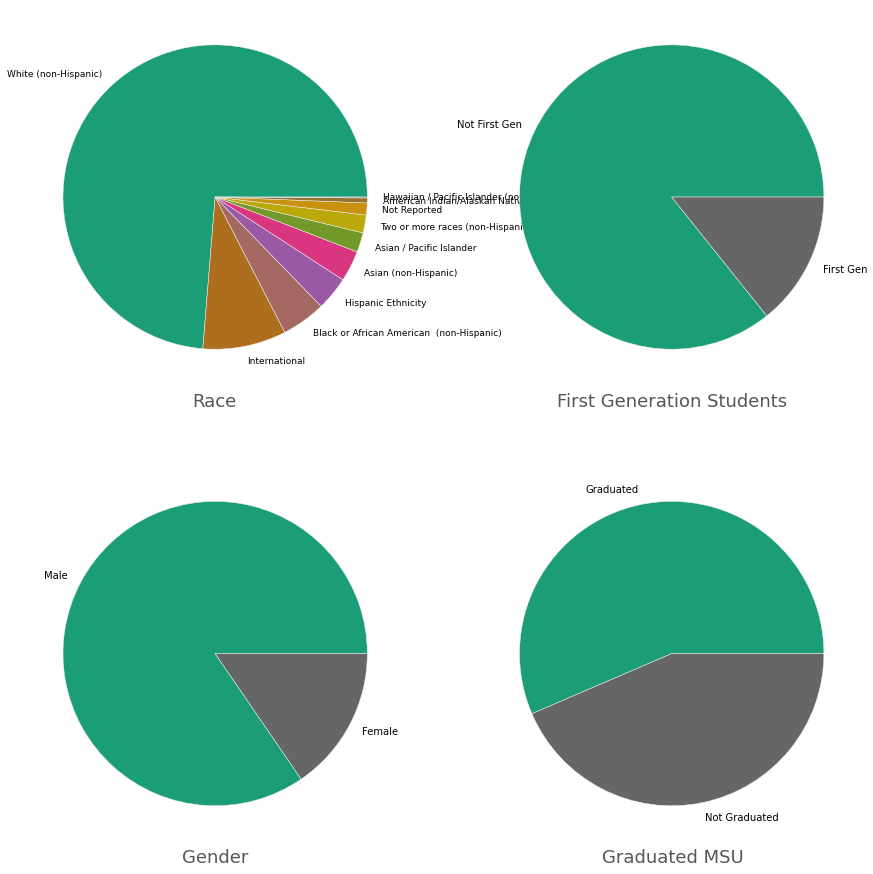

In [4]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15,15))

pd.DataFrame(StudentVector.Ethnicity.value_counts()
             /StudentVector.Ethnicity.count()).plot(kind='pie', subplots=True#, figsize=(8,8)
                                                   ,cmap='Dark2', legend=False, ax=ax1, fontsize=9
                                                   )
ax1.set_xlabel('Race', fontsize=18)
ax1.set_ylabel('')

pd.DataFrame(StudentVector['First Gen'].value_counts()
             /StudentVector['First Gen'].count()).plot(kind='pie', subplots=True#, figsize=(8,8)
                                                   ,cmap='Dark2', legend=False, labels=['Not First Gen','First Gen']
                                                      ,ax=ax2)
ax2.set_xlabel('First Generation Students', fontsize=18)
ax2.set_ylabel('')

pd.DataFrame(StudentVector['gndr_flag'].value_counts()
             /StudentVector['gndr_flag'].count()).plot(kind='pie', subplots=True#, figsize=(8,8)#, title='Demographics'
                                                   ,cmap='Dark2', legend=False, labels=['Male','Female']
                                                      ,ax=ax3)
ax3.set_xlabel('Gender', fontsize=18)
ax3.set_ylabel('')


pd.DataFrame(StudentVector['graduated MSU'].value_counts()
             /StudentVector['graduated MSU'].count()).plot(kind='pie', subplots=True#, figsize=(8,8)#, title='Demographics'
                                                   ,cmap='Dark2', legend=False, labels=['Graduated','Not Graduated']
                                                      ,ax=ax4)
ax4.set_xlabel('Graduated MSU', fontsize=18)
ax4.set_ylabel('')

# Things to remember

+ All of these students have declared physics major at some point
+ No outliers have been removed yet
+ total of 2111 students in this data set

# First take aways

+ The population is predominately white, male, and not first generation
+ A little more than half the students have graduated **(lets slice the data on these students!)**

In [5]:
StudentVector_outliers_removed = StudentVector[(StudentVector.MathCount > 0) & 
                                              (StudentVector.PhysicsCount > 0) &
                                              (StudentVector.MathCount < 20) &
                                              (StudentVector.PhysicsCount < 40)]

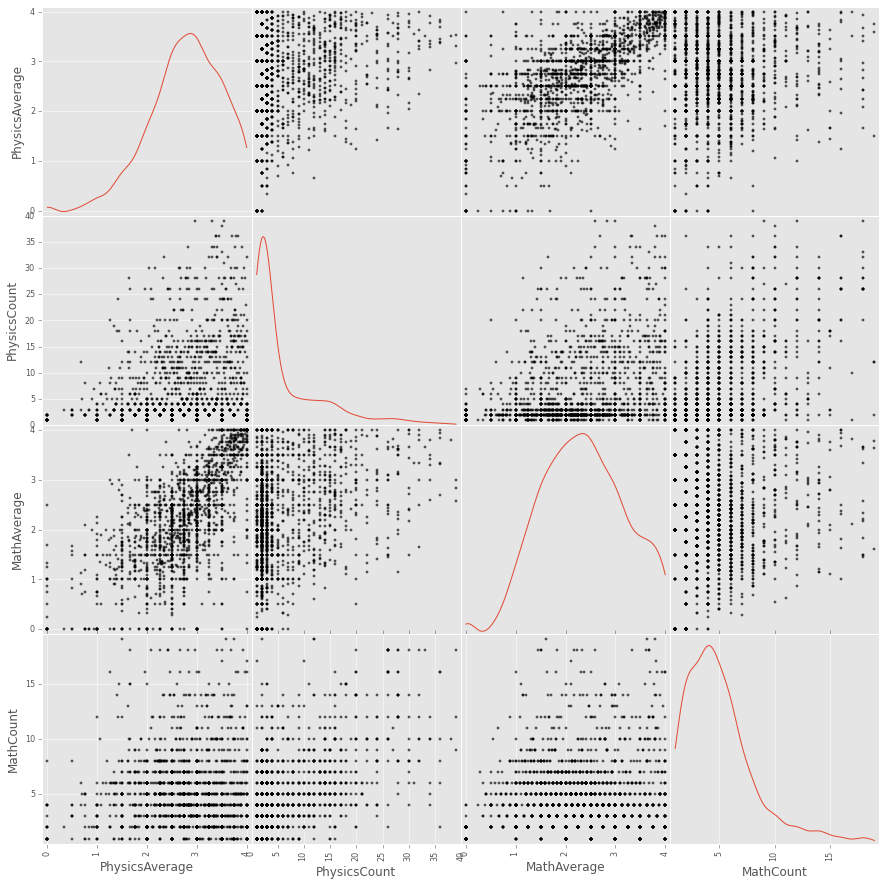

In [6]:
ax = scatter_matrix(StudentVector_outliers_removed[['PhysicsAverage', 'PhysicsCount', 'MathAverage', 'MathCount']], alpha=0.6
                    ,figsize=(15,15), diagonal='kde', color='black')

# Things to remember

+ All of these students have declared physics major at some point
+ We removed some outliers (some people seem to take 40-50 math/physics courses, why? We will look at them)
+ The diagonal is the [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)

# First takeaways

+ Average Physics GPA is $2.75 \pm 0.78$ (out of 4.0) **THIS IS WRONG CALCULATION CANT DO AVG OF AVG**
+ Average Math GPA is $2.28 \pm 0.98$ (out of 4.0)**THIS IS WRONG CALCULATION CANT DO AVG OF AVG**
+ Having a good math grade seems to correlate with having a good physics grade
+ A large number of students take less than 5 physics courses while declared as a physics major

# Next, lets look at people who took more than 5 physics courses

In [7]:
StudentVector_more_than_4_physics = StudentVector_outliers_removed[['PhysicsAverage'
                                , 'PhysicsCount'
                                , 'MathAverage'
                                , 'MathCount']][StudentVector_outliers_removed.PhysicsCount > 5]

In [8]:
StudentVector_more_than_4_physics.describe()

,PhysicsAverage,PhysicsCount,MathAverage,MathCount
count,563.000000,563.000000,563.000000,563.000000
mean,2.933518,14.976909,2.663409,7.019538
std,0.716270,7.429946,0.917172,3.901999
min,0.666667,6.000000,0.000000,1.000000
25%,2.454167,9.000000,2.000000,4.000000
50%,3.000000,14.000000,2.750000,6.000000
75%,3.541667,18.000000,3.500000,9.000000
max,4.000000,39.000000,4.000000,19.000000


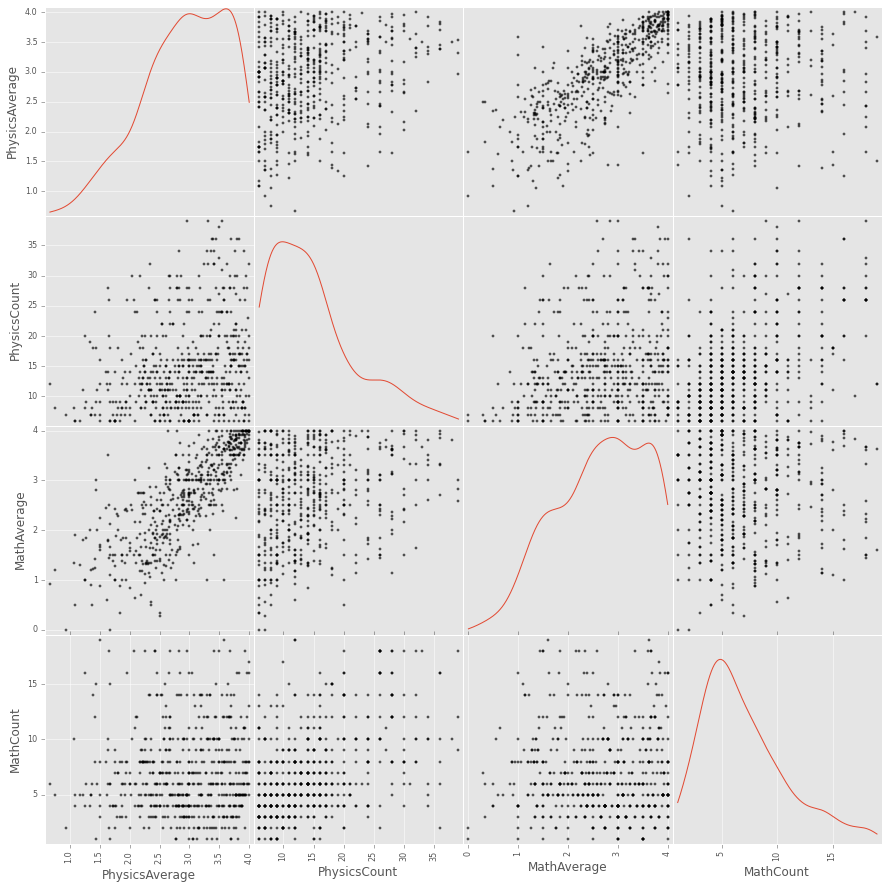

In [9]:
ax = scatter_matrix(StudentVector_more_than_4_physics
                    , alpha=0.6, figsize=(15,15), diagonal='kde', color='black')

# more insights

+ we can probably pull out sub-populations of students based on grade performance (although physics and math grade performance seems to be a linear relationship)
+ Average Physics GPA is $2.93 \pm 0.71$ (out of 4.0) **THIS IS WRONG CALCULATION CANT DO AVG OF AVG**
+ Average Math GPA is $2.66 \pm 0.92$ (out of 4.0) **THIS IS WRONG CALCULATION CANT DO AVG OF AVG**

# questions
+ how many physics/math courses do people need to graduate?

In [106]:
GraduatedMSU = StudentVector[StudentVector['graduated MSU'] == 'Y']

In [107]:
GraduatedMSU['graduated MSU primary major'].replace(to_replace=np.nan, value='0000 - nothing', inplace=True)


C:\Anaconda3\lib\site-packages\pandas\core\generic.py:2859: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [108]:
degrees = [x.split(' - ')[1] for x in GraduatedMSU['graduated MSU primary major'].values]
degrees = pd.DataFrame(degrees, columns=['Degree',], index=GraduatedMSU['graduated MSU primary major'].index)

In [109]:
degrees_pie = degrees.Degree.value_counts()

In [110]:
other = degrees_pie[degrees_pie <= 20].sum()
degrees_pie = degrees_pie[degrees_pie > 20]
degrees_pie.index

Index(['Physics', 'Astrophysics', 'Mechanical Engineering',
       'Applied Engineering Sciences', 'Civil Engineering',
       'Electrical Engineering', 'Packaging', 'Computer Science',
       'Mathematics', 'Computer Engineering', 'Economics'],
      dtype='object')

In [111]:
v = np.append(degrees_pie.values, other)
labels = np.append(degrees_pie.index, 'Other')
df = pd.DataFrame(v, columns=['d',])

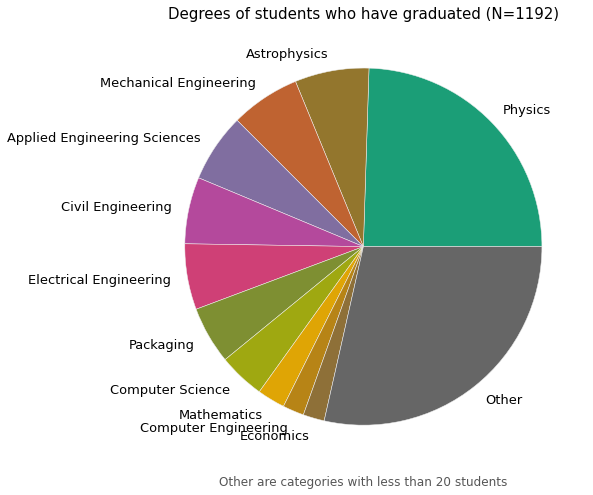

In [116]:
ax = df.plot(kind='pie', labels=labels, y='d', legend=False
             , figsize=[8,8], cmap='Dark2', fontsize=13)
ax.set_ylabel('')
ax.set_title('Degrees of students who have graduated (N={nvalue})'.format(nvalue=sum(v)), fontsize=15)
ax.set_xlabel('Other are categories with less than 20 students')

# Things to remember

+ All of these students have received their degree
+ Packaging is a real major [school of packaging](http://www.packaging.msu.edu/)
+ Other includes all majors whether they are STEM-focused or not

# Insights

+ Historically, a little more than 1/4 of students who declare physics/astrophysics major go on to get a degree in physics/astrophysics
+ At least 3/4 of students who graduated MSU who declared Physics went on to get a degree in STEM

In [17]:
graduated_students = StudentVector.ix[degrees.index]

In [18]:
graduated_students.describe()

,﻿id,EndTermSeqID,startTermSeqID,PhysicsAverage,PhysicsCount,MathAverage,MathCount
count,1192.000000,1192.000000,1192.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,1054.536074,1083.768456,1054.363255,2.728371,8.843003,2.371371,6.022184
std,611.903773,30.156715,139.461606,0.937073,11.065025,1.014442,5.245910
min,1.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,525.500000,1056.000000,1046.000000,2.333333,2.000000,1.800000,3.000000
50%,1057.000000,1084.000000,1074.000000,2.875000,3.000000,2.428571,5.000000
75%,1587.500000,1106.000000,1094.000000,3.392857,14.000000,3.100000,7.000000
max,2107.000000,1146.000000,1142.000000,4.000000,108.000000,4.000000,52.000000


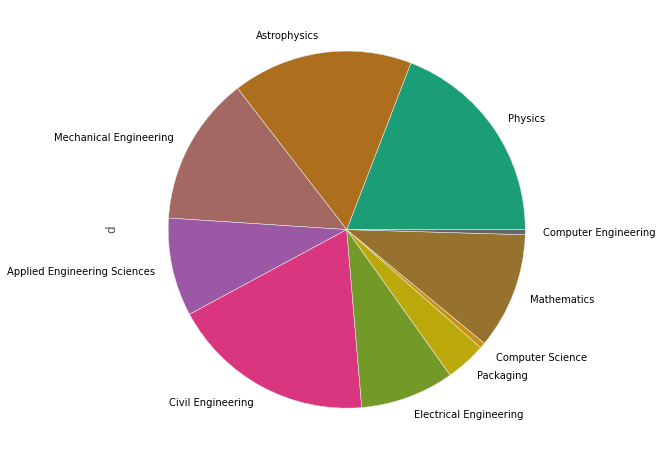

In [105]:
df.plot(kind='pie', labels=labels, y='d', legend=False, cmap='Dark2', fontsize=10, figsize=(8,8))

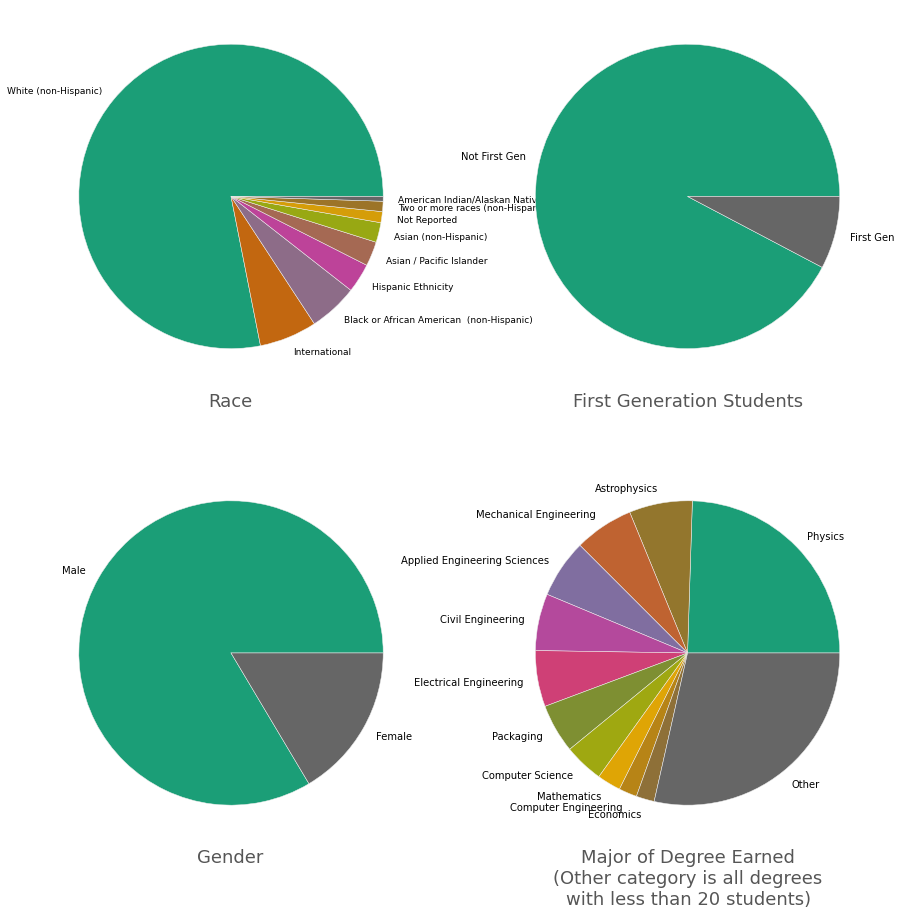

In [19]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15,15))

pd.DataFrame(graduated_students.Ethnicity.value_counts()
             /graduated_students.Ethnicity.count()).plot(kind='pie', subplots=True#, figsize=(8,8)
                                                   ,cmap='Dark2', legend=False, ax=ax1, fontsize=9
                                                   )
ax1.set_xlabel('Race', fontsize=18)
ax1.set_ylabel('')

pd.DataFrame(graduated_students['First Gen'].value_counts()
             /graduated_students['First Gen'].count()).plot(kind='pie', subplots=True#, figsize=(8,8)
                                                   ,cmap='Dark2', legend=False, labels=['Not First Gen','First Gen']
                                                      ,ax=ax2)
ax2.set_xlabel('First Generation Students', fontsize=18)
ax2.set_ylabel('')

pd.DataFrame(graduated_students['gndr_flag'].value_counts()
             /graduated_students['gndr_flag'].count()).plot(kind='pie', subplots=True#, figsize=(8,8)#, title='Demographics'
                                                   ,cmap='Dark2', legend=False, labels=['Male','Female']
                                                      ,ax=ax3)
ax3.set_xlabel('Gender', fontsize=18)
ax3.set_ylabel('')


df.plot(kind='pie', labels=labels, y='d', legend=False, cmap='Dark2', fontsize=10
            , ax=ax4)
ax4.set_ylabel('')
ax4.set_xlabel('Major of Degree Earned\n(Other category is all degrees\nwith less than 20 students)', fontsize=18)

# pd.DataFrame(graduated_students['graduated MSU'].value_counts()
#              /graduated_students['graduated MSU'].count()).plot(kind='pie', subplots=True#, figsize=(8,8)#, title='Demographics'
#                                                    ,cmap='Dark2', legend=False, labels=['Graduated','Not Graduated']
#                                                       ,ax=ax4)
# ax4.set_xlabel('Graduated MSU', fontsize=18)
# ax4.set_ylabel('')

In [24]:
PhysicsGrads.columns

Index(['﻿id', 'PlaceholderID', 'citizenship',
       'degree conferred for this major', 'EndTermSeqID', 'Ethnicity',
       'First Gen', 'first term in major', 'gndr_flag', 'graduated MSU',
       'graduated MSU primary major', 'major_code',
       'most recent term in major', 'pre-major class level', 'primary major',
       'startTermSeqID', 'undergrad Residency', 'PhysicsAverage',
       'PhysicsCount', 'MathAverage', 'MathCount'],
      dtype='object')

In [33]:
StudentVector['gndr_flag'].value_counts()/StudentVector['gndr_flag'].count()

M    0.845571
F    0.154429
dtype: float64

In [32]:
graduated_students['gndr_flag'].value_counts()/graduated_students['gndr_flag'].count()

M    0.83557
F    0.16443
dtype: float64

In [31]:
PhysicsGrads['gndr_flag'].value_counts()/PhysicsGrads['gndr_flag'].count()

M    0.831395
F    0.168605
dtype: float64

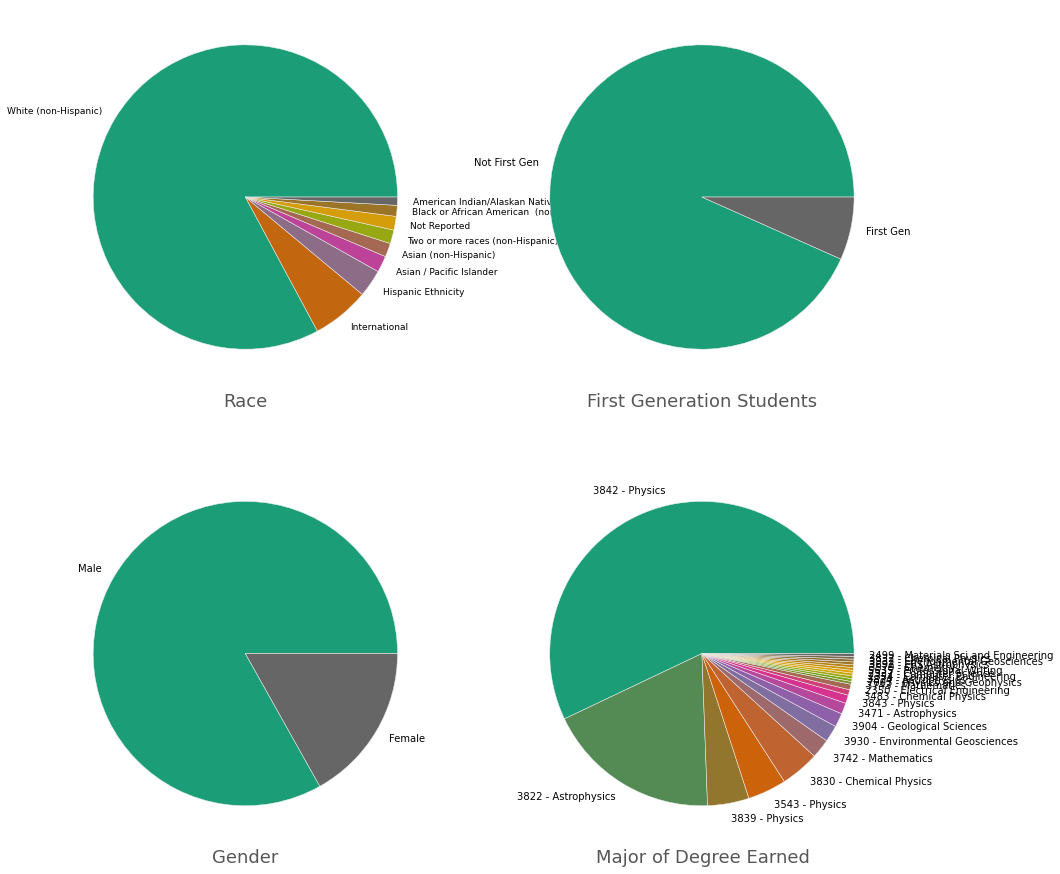

In [29]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15,15))

pd.DataFrame(PhysicsGrads.Ethnicity.value_counts()
             /PhysicsGrads.Ethnicity.count()).plot(kind='pie', subplots=True#, figsize=(8,8)
                                                   ,cmap='Dark2', legend=False, ax=ax1, fontsize=9
                                                   )
ax1.set_xlabel('Race', fontsize=18)
ax1.set_ylabel('')

pd.DataFrame(PhysicsGrads['First Gen'].value_counts()
             /PhysicsGrads['First Gen'].count()).plot(kind='pie', subplots=True#, figsize=(8,8)
                                                   ,cmap='Dark2', legend=False, labels=['Not First Gen','First Gen']
                                                      ,ax=ax2)
ax2.set_xlabel('First Generation Students', fontsize=18)
ax2.set_ylabel('')

pd.DataFrame(PhysicsGrads['gndr_flag'].value_counts()
             /PhysicsGrads['gndr_flag'].count()).plot(kind='pie', subplots=True#, figsize=(8,8)#, title='Demographics'
                                                   ,cmap='Dark2', legend=False, labels=['Male','Female']
                                                      ,ax=ax3)
ax3.set_xlabel('Gender', fontsize=18)
ax3.set_ylabel('')


pd.DataFrame(PhysicsGrads['graduated MSU primary major'].value_counts()
             /PhysicsGrads['graduated MSU primary major'].count()).plot(kind='pie', subplots=True#, figsize=(8,8)#, title='Demographics'
                                                   ,cmap='Dark2', legend=False
                                                      ,ax=ax4)

# daf.plot(kind='pie', labels=labels, y='d', legend=False, cmap='Dark2', fontsize=10
#             , ax=ax4)
ax4.set_ylabel('')
ax4.set_xlabel('Major of Degree Earned', fontsize=18)

# pd.DataFrame(graduated_students['graduated MSU'].value_counts()
#              /graduated_students['graduated MSU'].count()).plot(kind='pie', subplots=True#, figsize=(8,8)#, title='Demographics'
#                                                    ,cmap='Dark2', legend=False, labels=['Graduated','Not Graduated']
#                                                       ,ax=ax4)
# ax4.set_xlabel('Graduated MSU', fontsize=18)
# ax4.set_ylabel('')

In [25]:
StudentVector.columns

Index(['﻿id', 'PlaceholderID', 'citizenship',
       'degree conferred for this major', 'EndTermSeqID', 'Ethnicity',
       'First Gen', 'first term in major', 'gndr_flag', 'graduated MSU',
       'graduated MSU primary major', 'major_code',
       'most recent term in major', 'pre-major class level', 'primary major',
       'startTermSeqID', 'undergrad Residency', 'PhysicsAverage',
       'PhysicsCount', 'MathAverage', 'MathCount'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009D9CCC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BE8B588>]], dtype=object)

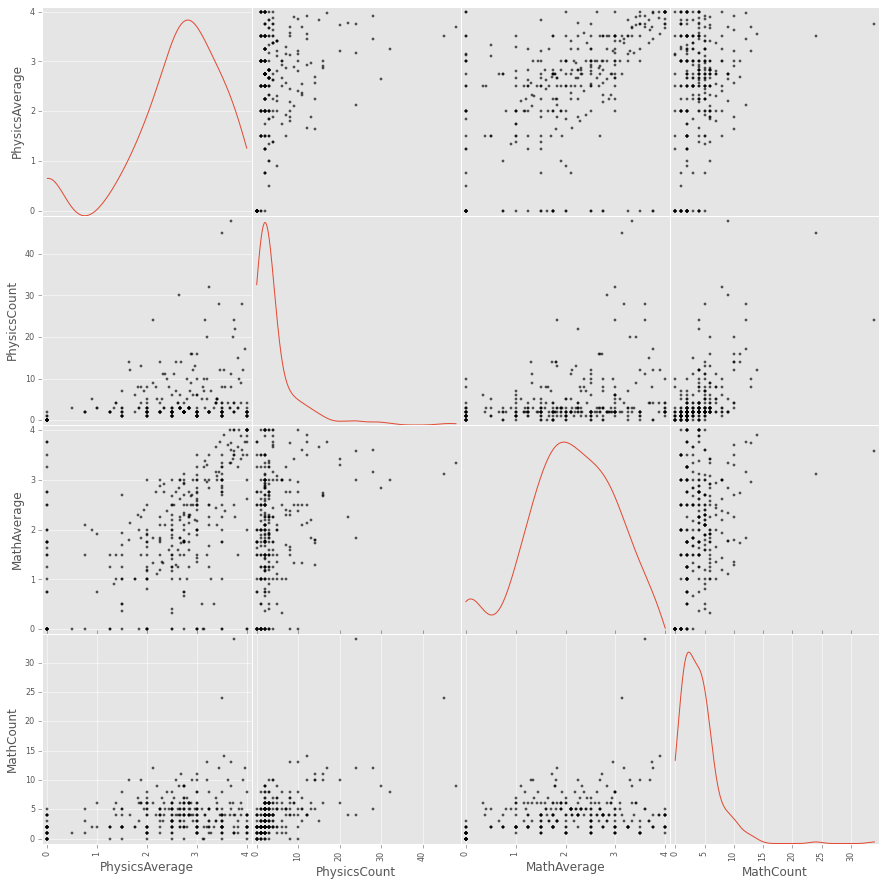

In [26]:


scatter_matrix(StudentVector[StudentVector['First Gen']=='Y'][['PhysicsAverage'
                                , 'PhysicsCount'
                                , 'MathAverage'
                                , 'MathCount']]
              , alpha=0.6, figsize=(15,15), diagonal='kde', color='black')

In [129]:
df1 = StudentVector[StudentVector['degree conferred for this major'] == 'Y']
df2 = StudentVector[(StudentVector['degree conferred for this major'] == 'N') &
             (StudentVector['graduated MSU'] == 'Y')]

In [130]:
graduated = pd.concat([df1,df2])

In [131]:
colors = []
for g in graduated['degree conferred for this major'].values:
    if g == 'Y':
        colors.append('red')
    else:
        colors.append('black')
        
#graduated['color'] = color

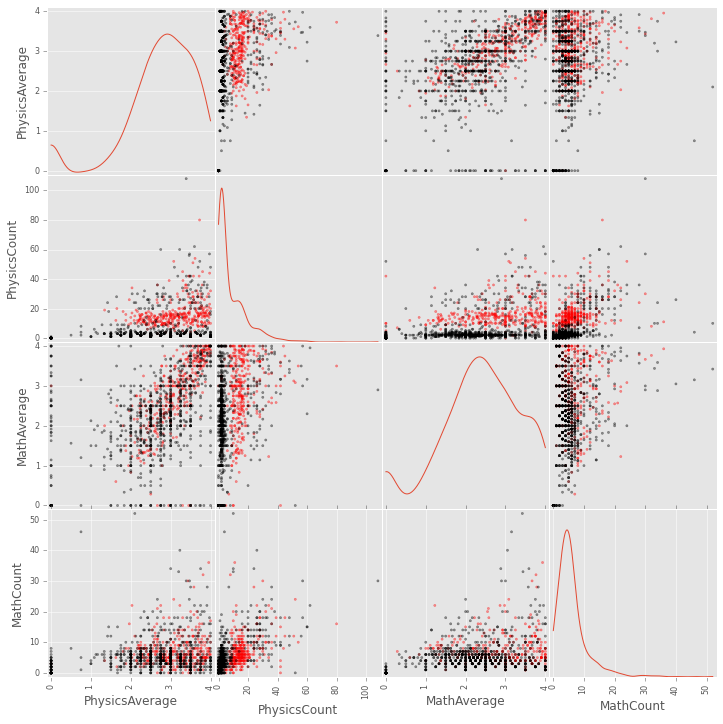

In [132]:
axes = scatter_matrix(graduated[['PhysicsAverage'
                                , 'PhysicsCount'
                                , 'MathAverage'
                                , 'MathCount']]
                     ,figsize=(12,12), alpha=0.4, color=colors
                      ,diagonal='kde')

In [266]:
graduated_no_outliers = graduated[['PhysicsAverage','degree conferred for this major','MathAverage']]
graduated_no_outliers['PhysicsAverage'] = graduated_no_outliers[graduated_no_outliers.PhysicsAverage != 0]
graduated_no_outliers['MathAverage'] = graduated_no_outliers[graduated_no_outliers.MathAverage != 0]



math_no = graduated_no_outliers[graduated_no_outliers['degree conferred for this major'] =='N']['PhysicsAverage'].values
physics_no = graduated_no_outliers[graduated_no_outliers['degree conferred for this major'] =='N']['MathAverage'].values

math_yes = graduated_no_outliers[graduated_no_outliers['degree conferred for this major'] =='Y']['PhysicsAverage'].values
physics_yes = graduated_no_outliers[graduated_no_outliers['degree conferred for this major'] =='Y']['MathAverage'].values

C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [269]:



X = physics_no#np.nan_to_num(physics_no)#.reshape((848,1))
Y = math_no#np.nan_to_num(math_no)#.reshape((848,1))

In [270]:
from sklearn import linear_model
lin_model_NO = linear_model.LinearRegression(fit_intercept=True).fit(X, Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

theta_0  0.506234375983
theta_1  1.43046512899


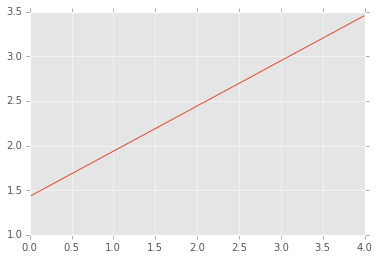

In [258]:
print('theta_0 ', lin_model_NO.coef_[0][0]) 
print('theta_1 ', lin_model_NO.intercept_[0])
"f(x) = m * x + b"
"f(x) = theta_0 * X + theta_1"

theta_0 = lin_model_NO.coef_[0][0]
theta_1 = lin_model_NO.intercept_[0]

fake_X = np.arange(0,4,.01)


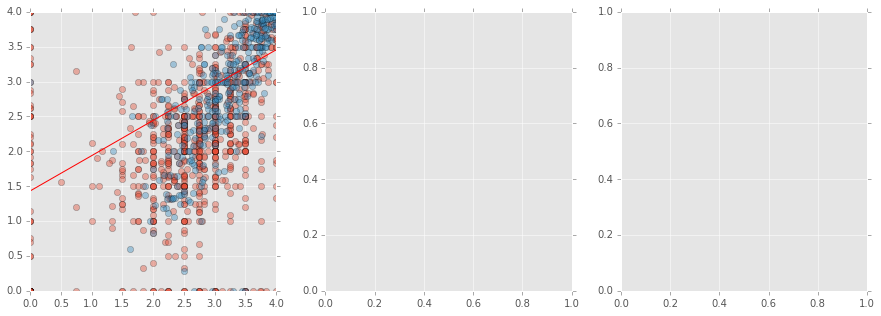

In [259]:
fig, (ax_1, ax_2, ax_3) = plt.subplots(1,3, sharex=False, sharey=False, figsize=(15,5))


ax_1.plot(math_no,physics_no, marker='o',linewidth=0, alpha=0.4)
ax_1.plot(math_yes,physics_yes, marker='o',linewidth=0, alpha=0.4)
ax_1.plot(fake_X, (fake_X*theta_0+theta_1), color='red')

In [209]:
from matplotlib.pylab import pcolor

def make_correlation_matrix(df, title):
  """
  Creates a matplotlib plot of values (typically a correlation dataframe from Pandas).
  This plot has each value in a cell shaded on a color map for the entire
  matrix. The color map is by default reverse gray scale.
  
  requirements: matplotlib, pandas
  """

  fig, ax = plt.subplots(figsize=(12,12))
  pcolor(df, cmap='gray_r')
  plt.title(title)
  for n,mc in enumerate(df.values):
      for i,m in enumerate(mc):
  
          plt.text(n+0.35, i+0.35, str(round(m,2)), color='white', fontsize=24)
  plt.xticks(np.arange(0.5, 5.5, 1))
  plt.yticks(np.arange(0.5, 5.5, 1))
  labels = list(df.columns) # ['Video Access Fraction', 'Video Access Density', 'Course Grade', 'FMCE Pre', 'FMCE post']
  ax.set_xticklabels(labels, rotation=90, fontsize=12)
  ax.set_yticklabels(labels, rotation=0, fontsize=12)

In [213]:
graduated[['PhysicsAverage'
        , 'PhysicsCount'
        , 'MathAverage'
        , 'MathCount']].corr()

,PhysicsAverage,PhysicsCount,MathAverage,MathCount
PhysicsAverage,1.000000,0.330730,0.513710,0.208295
PhysicsCount,0.330730,1.000000,0.338973,0.524599
MathAverage,0.513710,0.338973,1.000000,0.281042
MathCount,0.208295,0.524599,0.281042,1.000000


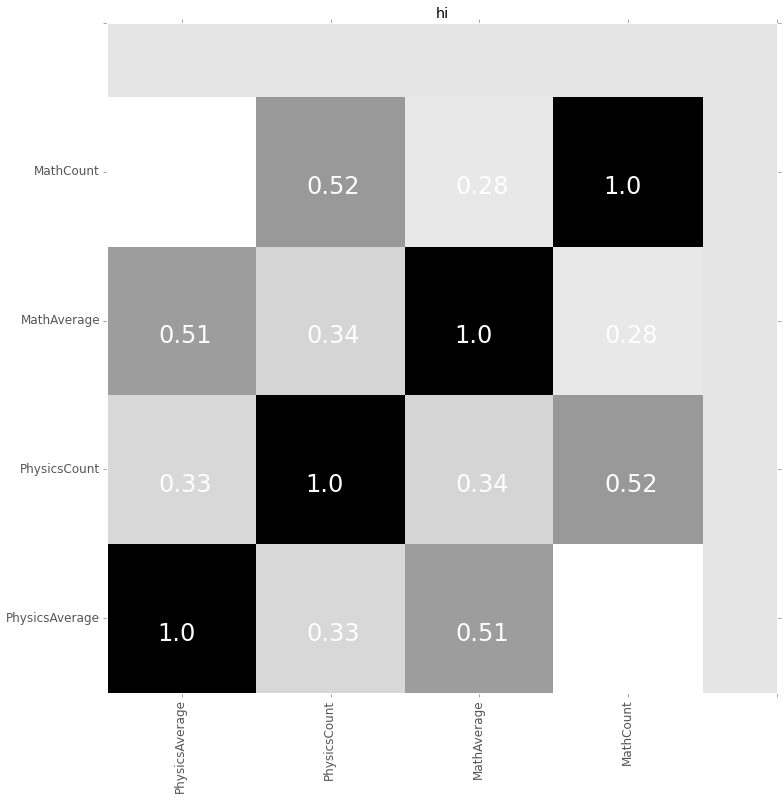

In [214]:
make_correlation_matrix(graduated[['PhysicsAverage'
        , 'PhysicsCount'
        , 'MathAverage'
        , 'MathCount']].corr(), 'hi')

In [31]:
grades = pd.read_csv(r"C:\Users\John\OneDrive\Work\educational data mining consulting\MSU project pathways\data\GradesPerCourse.csv")

In [32]:
grades.columns

Index(['﻿PlaceholderID', 'degree conferred for this major', 'SubjectCode',
       'grade_code'],
      dtype='object')

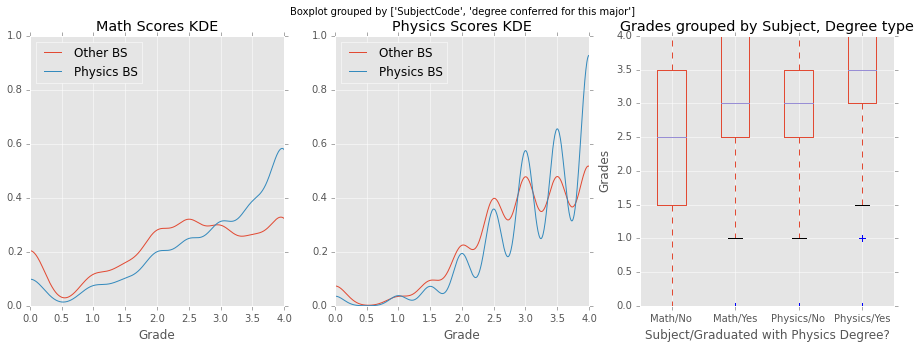

In [118]:
fig, (ax_1, ax_2, ax_3) = plt.subplots(1,3, sharex=False, sharey=False, figsize=(15,5))


mth_no_x = ax1.lines[0].get_xdata()
mth_no_y = ax1.lines[0].get_ydata()

mth_yes_x = ax3.lines[0].get_xdata()
mth_yes_y = ax3.lines[0].get_ydata()

ax_1.plot(mth_no_x, mth_no_y, label='Other BS')
ax_1.plot(mth_yes_x, mth_yes_y, label='Physics BS')
ax_1.set_ylim(0,1)
ax_1.set_xlim(0,4)
ax_1.set_title('Math Scores KDE')
ax_1.set_xlabel('Grade')
ax_1.legend(loc='upper left')

phys_no_x = ax2.lines[0].get_xdata()
phys_no_y = ax2.lines[0].get_ydata()


phys_yes_x = ax4.lines[0].get_xdata()
phys_yes_y = ax4.lines[0].get_ydata()

ax_2.plot(phys_no_x, phys_no_y, label='Other BS')
ax_2.plot(phys_yes_x, phys_yes_y, label='Physics BS')
ax_2.set_ylim(0,1)
ax_2.set_xlim(0,4)
ax_2.set_title('Physics Scores KDE')
ax_2.legend(loc='upper left')
ax_2.set_xlabel('Grade')

grades.boxplot(by=['SubjectCode','degree conferred for this major'], figsize=(7,5), ax=ax_3)

ax_3.set_xlabel('Subject/Graduated with Physics Degree?')
ax_3.set_xticklabels(['Math/No', 'Math/Yes', 'Physics/No', 'Physics/Yes'])
ax_3.set_ylabel('Grades')
ax_3.set_title('Grades grouped by Subject, Degree type')

# Things to remember

+ line plots represent KDEs, a non-parametric way to estimate the PDF
+ blue line indicates median value in box plot
+ caps on boxplot indicate outside 1/3's, boxes indicate quartiles
+ ALL OF THESE STUDENTS DECLARED PHYSICS AT SOME POINT!

# initial observations

+ math scores for physics majors may diverge at the higher end
+ There is a non-negligible number of students getting 0.0 grades in math courses, whats going on there? (not for this researcher to find out)
+ Physics scores seems to have the same divergence as the math scores at the high end (>3.0)
+ the oscillations are due to the data being "technically" categorical since it is only [0.0-4.0,0.5]. I have no idea why the first plot doesn't have this. These two plots are really more "should I look more in this direction than they are publishable plots". I like non-parametric methods because I'd rather NOT assume a distribution.
+ the box plot however is interesting. Median scores for students who 

# questions

+ do students in the group "Math/No Physics degree" lower quartiles take an "off-ramp" earlier than students in the upper quartiles? (this can be measured by simply counting the number of physics classes they take)
+ Is there a reason physics scores are overall higher than math scores? (not for this researcher to find out but interesting since we are making the comparison)


In [207]:
# print('mean: \n',grades.groupby('degree conferred for this major').mean()
#       ,'\n\nsem: \n',grades.groupby('degree conferred for this major').std())

In [121]:
StudentVector.columns

Index(['﻿id', 'PlaceholderID', 'citizenship',
       'degree conferred for this major', 'EndTermSeqID', 'Ethnicity',
       'First Gen', 'first term in major', 'gndr_flag', 'graduated MSU',
       'graduated MSU primary major', 'major_code',
       'most recent term in major', 'pre-major class level', 'primary major',
       'startTermSeqID', 'undergrad Residency', 'PhysicsAverage',
       'PhysicsCount', 'MathAverage', 'MathCount'],
      dtype='object')

In [125]:
lower_quartile = StudentVector[(StudentVector['degree conferred for this major']=='N') &
             (StudentVector['MathAverage'] <= 2.5)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000119BECF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013A682E8>]], dtype=object)

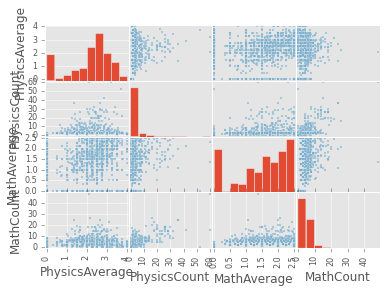

In [126]:
scatter_matrix(lower_quartile[['PhysicsAverage'
                                , 'PhysicsCount'
                                , 'MathAverage'
                                , 'MathCount']])